In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Read dataset
crime_data = pd.read_csv("crime_data.csv")
crime_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


###### EDA

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
crime_data = crime_data.rename(columns={"Unnamed: 0":"Places"})
crime_data.head(2)

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [8]:
crime_data.isna().sum()

Places      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
crime_data[crime_data.duplicated()]

,Places,Murder,Assault,UrbanPop,Rape


###### Visualization

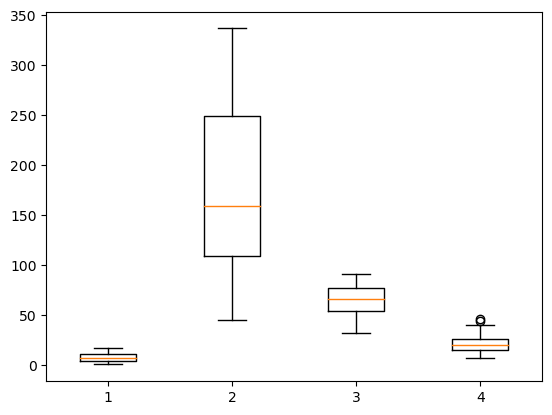

In [10]:
#Boxplot for all numerical columns.
plt.boxplot(crime_data.drop('Places',axis=1));

- Outliers present in 4th column.

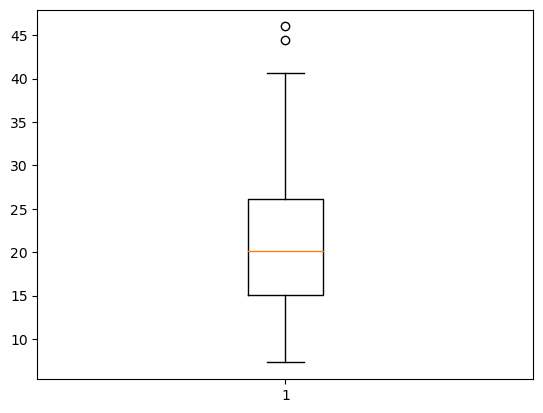

In [11]:
#Boxplot for Rape column.
plt.boxplot(crime_data['Rape']);

In [12]:
#Checking outliers entries.
crime_data[crime_data['Rape'] > 42]

,Places,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


In [13]:
crime_data.head()

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Use standardization on data.

In [14]:
# Neccessory libraries
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [15]:
# Creating new variable for standerdised data.
df1 = Scaler.fit_transform(crime_data.iloc[:,1:])
pd.DataFrame(df1).head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [16]:
crime_data.columns

Index(['Places', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [17]:
# Final standerdised data stored in varable std_data
std_data = pd.DataFrame(columns=['Murder', 'Assault', 'UrbanPop', 'Rape'], data=df1)
std_data.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## 1) Hierarchical Clustering (Agglomerative Clustering)

In [18]:
# Neccessory libraries.
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

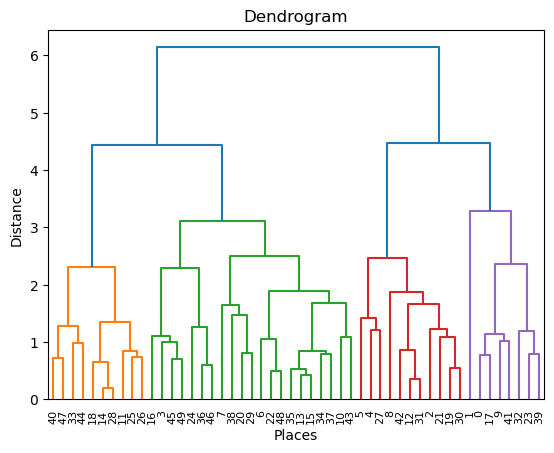

In [19]:
# Plot dendrogram
Dendrogram = sch.dendrogram(sch.linkage(std_data, method='complete'));
plt.title('Dendrogram');
plt.xlabel('Places');
plt.ylabel('Distance');

In [20]:
# Creating clusters
hc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage='complete')
hc.fit(std_data)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [21]:
hc.labels_

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [22]:
# Creating new variable to store clusters column, after perfoming hierarchical clustering.
crime_data_HC = crime_data

In [23]:
crime_data_HC['Clusters'] = hc.labels_
crime_data_HC.head()

,Places,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [24]:
# Sorting places based on clusters.
df2 = crime_data_HC.sort_values('Clusters')
df2.iloc[:,[0,-1]]

,Places,Clusters
0,Alabama,0
17,Louisiana,0
23,Mississippi,0
32,North Carolina,0
39,South Carolina,0
9,Georgia,0
1,Alaska,0
41,Tennessee,0
43,Utah,1
38,Rhode Island,1


In [25]:
# Places present in 0th cluster.
crime_data_HC[crime_data_HC['Clusters'] == 0]

,Places,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [26]:
# Places present in 1st cluster.
crime_data_HC[crime_data_HC['Clusters'] == 1]

,Places,Murder,Assault,UrbanPop,Rape,Clusters
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [27]:
# Unique clusters.
crime_data_HC['Clusters'].unique()

array([0, 2, 1, 3], dtype=int64)

In [28]:
# Total numbers of places present in each cluster.
crime_data_HC['Clusters'].value_counts()

1    21
2    11
3    10
0     8
Name: Clusters, dtype: int64

In [29]:
# Calculating mean of each cluster for each columnn.
crime_data_HC.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.537500
1,1,5.871429,134.476190,70.761905,18.580952
2,2,11.054545,264.090909,79.090909,32.618182
3,3,3.180000,78.700000,49.300000,11.630000


## 2) K-Means Clustering

In [30]:
# Neccessory libraries.
from sklearn.cluster import KMeans

In [31]:
# Clusters = 5(Random selection)
kmeans = KMeans(n_clusters=5, random_state=0)
predict = kmeans.fit_predict(std_data)
predict

array([0, 4, 4, 3, 4, 4, 2, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 2, 4,
       3, 0, 4, 3, 3, 4, 1, 2, 4, 4, 0, 1, 3, 3, 3, 3, 2, 0, 1, 0, 4, 2,
       1, 3, 3, 1, 1, 3])

In [32]:
df = pd.DataFrame({'pred_clusters' : predict})
df.head()

,pred_clusters
0,0
1,4
2,4
3,3
4,4


In [33]:
df['pred_clusters'].unique()

array([0, 4, 3, 2, 1])

In [34]:
df['pred_clusters'].value_counts()

3    15
4    13
1     9
0     7
2     6
Name: pred_clusters, dtype: int64

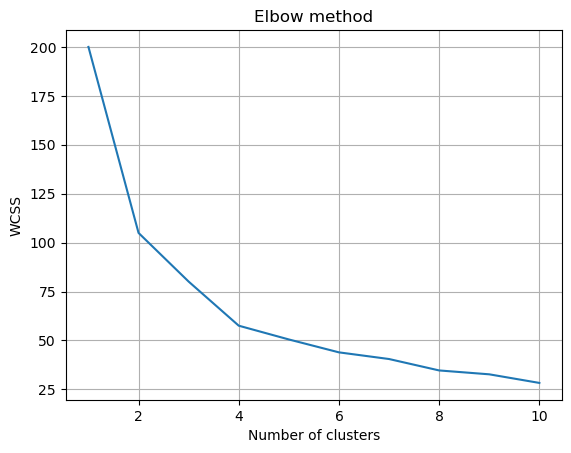

In [35]:
# Finding optimum number of cluster.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

- By ELBOW graph we can select optimum number of clusters using WCSS.
- Selected number of clusters = 4

In [36]:
# Building cluster algorithm
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(std_data)
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [37]:
# Creating new variable of data for k-means.
crime_data_KM = crime_data

In [38]:
# storing clusters in new variable.
crime_data_KM['Clusters'] = kmeans.labels_
crime_data_KM.head(10)

,Places,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [39]:
# Total places presrent in 0th cluster.
crime_data_KM[crime_data['Clusters'] == 0]

,Places,Murder,Assault,UrbanPop,Rape,Clusters
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [40]:
# Total places presrent in 1st cluster.
crime_data_KM[crime_data['Clusters'] == 1]

,Places,Murder,Assault,UrbanPop,Rape,Clusters
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [41]:
# Unique clusters
crime_data_KM['Clusters'].unique()

array([3, 1, 0, 2])

In [42]:
# Total numbers of places present in each cluster.
crime_data_KM['Clusters'].value_counts()

0    16
1    13
2    13
3     8
Name: Clusters, dtype: int64

In [43]:
# Calculating mean of each cluster for each columnn.
crime_data_KM.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


## 3) DBSCAN Clustering

In [44]:
# Neccessory libraries.
from sklearn.cluster import DBSCAN

In [45]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit_predict(std_data)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [46]:
# Creating new variable to store clusters.
crime_data_DB = crime_data

In [47]:
# Store clusters in new variable.
crime_data_DB['Clusters'] = dbscan.labels_
crime_data_DB.head(10)

,Places,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [48]:
# Noise/Outliers present in the  dataset.
crime_data_DB[crime_data_DB['Clusters'] == -1]

,Places,Murder,Assault,UrbanPop,Rape,Clusters
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
10,Hawaii,5.3,46,83,20.2,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


In [49]:
# Total places present in 3rd cluster.
crime_data_DB[crime_data_DB['Clusters'] == 3]

,Places,Murder,Assault,UrbanPop,Rape,Clusters
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
30,New Mexico,11.4,285,70,32.1,3


In [50]:
# Unique clusters.
crime_data_DB['Clusters'].unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

In [51]:
# Total number of Places present in each cluster.
crime_data_DB['Clusters'].value_counts()

 1    28
-1    10
 0     6
 2     3
 3     3
Name: Clusters, dtype: int64

- Total number of noise present in dataset = 10

In [52]:
# Calculating mean of each cluster for each columnn.
crime_data_DB.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.560,243.500000,70.800000,30.430000
1,0,14.950,237.000000,55.833333,22.616667
2,1,4.825,112.035714,63.357143,16.107143
3,2,11.400,234.666667,83.000000,25.200000
4,3,11.600,280.000000,70.333333,31.666667


## =======================================================================